<a href="https://colab.research.google.com/github/cppel/data/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%E2%84%9611_%D0%90%D0%BD%D1%81%D0%B0%D0%BC%D0%B1%D0%BB%D0%B5%D0%B2%D1%8B%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Обучить модели машинного обучения для решения задачи классификации, используя следующие boosting-алгоритмы: CatBoost, Light GBM, XGBoost, AdaBoost. Сравнить их точность и быстродействие.

Датасет: https://www.kaggle.com/c/titanic/data

## Подготовка и анализ данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pathToData = "/content/drive/MyDrive/task11"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
print(os.listdir(pathToData))

['train.csv', 'test.csv', 'gender_submission.csv']


In [ ]:
# Ваш код
train = pd.read_csv(pathToData + "/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test = pd.read_csv(pathToData + "/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
all = pd.concat([train, test], sort = False)
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [ ]:
#Fill Missing numbers with median
all['Age'] = all['Age'].fillna(value=all['Age'].median())
all['Fare'] = all['Fare'].fillna(value=all['Fare'].median())

In [ ]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


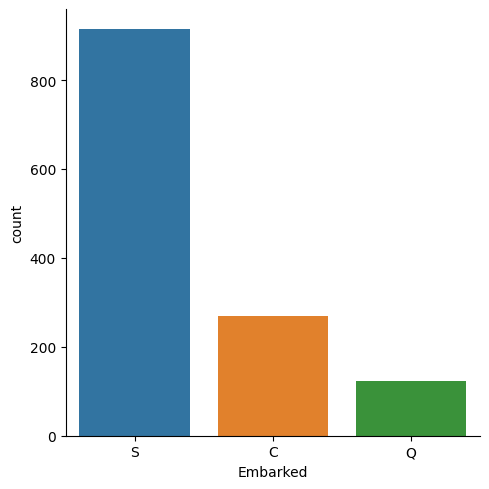

In [ ]:
sns.catplot(x = 'Embarked', kind = 'count', data = all) #or all['Embarked'].value_counts()

In [ ]:
all['Embarked'] = all['Embarked'].fillna('S')
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [ ]:
#Age
all.loc[ all['Age'] <= 16, 'Age'] = 0
all.loc[(all['Age'] > 16) & (all['Age'] <= 32), 'Age'] = 1
all.loc[(all['Age'] > 32) & (all['Age'] <= 48), 'Age'] = 2
all.loc[(all['Age'] > 48) & (all['Age'] <= 64), 'Age'] = 3
all.loc[ all['Age'] > 64, 'Age'] = 4

In [ ]:
#Title
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+\.)', name)

    if title_search:
        return title_search.group(1)
    return ""

In [ ]:
all['Title'] = all['Name'].apply(get_title)
all['Title'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
Countess.      1
Jonkheer.      1
Dona.          1
Name: Title, dtype: int64

In [ ]:
all['Title'] = all['Title'].replace(['Capt.', 'Dr.', 'Major.', 'Rev.'], 'Officer.')
all['Title'] = all['Title'].replace(['Lady.', 'Countess.', 'Don.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Royal.')
all['Title'] = all['Title'].replace(['Mlle.', 'Ms.'], 'Miss.')
all['Title'] = all['Title'].replace(['Mme.'], 'Mrs.')
all['Title'].value_counts()

Mr.         757
Miss.       264
Mrs.        198
Master.      61
Officer.     19
Royal.        6
Col.          4
Name: Title, dtype: int64

In [ ]:
#Cabin
all['Cabin'] = all['Cabin'].fillna('Missing')
all['Cabin'] = all['Cabin'].str[0]
all['Cabin'].value_counts()

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [ ]:
#Family Size & Alone
all['Family_Size'] = all['SibSp'] + all['Parch'] + 1
all['IsAlone'] = 0
all.loc[all['Family_Size']==1, 'IsAlone'] = 1
all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,IsAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,M,S,Mr.,2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,C,C,Mrs.,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,M,S,Miss.,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C,S,Mrs.,2,0
4,5,0.0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,M,S,Mr.,1,1


In [ ]:
#Drop unwanted variables
all_1 = all.drop(['Name', 'Ticket'], axis = 1)
all_1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Family_Size,IsAlone
0,1,0.0,3,male,1.0,1,0,7.2500,M,S,Mr.,2,0
1,2,1.0,1,female,2.0,1,0,71.2833,C,C,Mrs.,2,0
2,3,1.0,3,female,1.0,0,0,7.9250,M,S,Miss.,1,1
3,4,1.0,1,female,2.0,1,0,53.1000,C,S,Mrs.,2,0
4,5,0.0,3,male,2.0,0,0,8.0500,M,S,Mr.,1,1


In [ ]:
all_dummies = pd.get_dummies(all_1, drop_first = True)
all_dummies.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,IsAlone,Sex_male,...,Cabin_M,Cabin_T,Embarked_Q,Embarked_S,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Officer.,Title_Royal.
0,1,0.0,3,1.0,1,0,7.2500,2,0,1,...,1,0,0,1,0,0,1,0,0,0
1,2,1.0,1,2.0,1,0,71.2833,2,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,3,1.0,0,0,7.9250,1,1,0,...,1,0,0,1,0,1,0,0,0,0
3,4,1.0,1,2.0,1,0,53.1000,2,0,0,...,0,0,0,1,0,0,0,1,0,0
4,5,0.0,3,2.0,0,0,8.0500,1,1,1,...,1,0,0,1,0,0,1,0,0,0


In [ ]:
all_train = all_dummies[all_dummies['Survived'].notna()]
all_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    float64
 2   Pclass          891 non-null    int64  
 3   Age             891 non-null    float64
 4   SibSp           891 non-null    int64  
 5   Parch           891 non-null    int64  
 6   Fare            891 non-null    float64
 7   Family_Size     891 non-null    int64  
 8   IsAlone         891 non-null    int64  
 9   Sex_male        891 non-null    uint8  
 10  Cabin_B         891 non-null    uint8  
 11  Cabin_C         891 non-null    uint8  
 12  Cabin_D         891 non-null    uint8  
 13  Cabin_E         891 non-null    uint8  
 14  Cabin_F         891 non-null    uint8  
 15  Cabin_G         891 non-null    uint8  
 16  Cabin_M         891 non-null    uint8  
 17  Cabin_T         891 non-null    uin

In [ ]:
all_test = all_dummies[all_dummies['Survived'].isna()]
all_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     418 non-null    int64  
 1   Survived        0 non-null      float64
 2   Pclass          418 non-null    int64  
 3   Age             418 non-null    float64
 4   SibSp           418 non-null    int64  
 5   Parch           418 non-null    int64  
 6   Fare            418 non-null    float64
 7   Family_Size     418 non-null    int64  
 8   IsAlone         418 non-null    int64  
 9   Sex_male        418 non-null    uint8  
 10  Cabin_B         418 non-null    uint8  
 11  Cabin_C         418 non-null    uint8  
 12  Cabin_D         418 non-null    uint8  
 13  Cabin_E         418 non-null    uint8  
 14  Cabin_F         418 non-null    uint8  
 15  Cabin_G         418 non-null    uint8  
 16  Cabin_M         418 non-null    uint8  
 17  Cabin_T         418 non-null    uin

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_train.drop(['PassengerId','Survived'],axis=1),
                                                    all_train['Survived'], test_size=0.30,
                                                    random_state=101, stratify = all_train['Survived'])

### Построение Модели AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
ada = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=100, random_state=0)
ada.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                   random_state=0)

In [ ]:
predictions = ada.predict(X_test)

#### Результаты работы алгоритма *AdaBoost*

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82       165
         1.0       0.74      0.58      0.65       103

    accuracy                           0.76       268
   macro avg       0.76      0.73      0.74       268
weighted avg       0.76      0.76      0.75       268



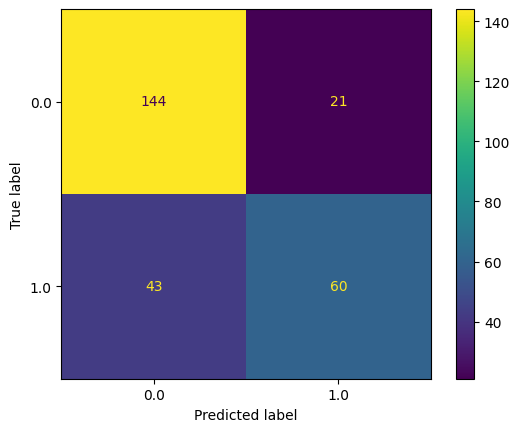

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, predictions, labels=ada.classes_), display_labels=ada.classes_).plot()
plt.show()

### Построение алгоритма *XGBoost*

In [ ]:
import pandas as pd
import xgboost as xgb

In [ ]:
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train, y_train)

In [ ]:
gbm_predictions = gbm.predict(X_test)

#### Результаты работы алгоритма *XGBoost*

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,gbm_predictions))

              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85       165
         1.0       0.80      0.67      0.73       103

    accuracy                           0.81       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.81      0.81       268



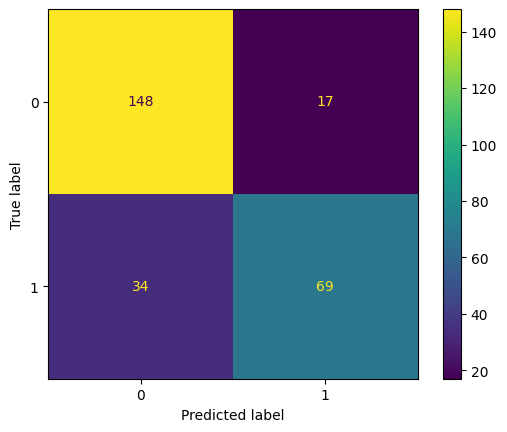

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, gbm_predictions, labels=gbm.classes_), display_labels=gbm.classes_).plot()
plt.show()

### Построение алгоритма Light GBM

In [ ]:
import lightgbm as lgbm

lgbm_model = lgbm.LGBMClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train, y_train)
lgbm_predictions = lgbm_model.predict(X_test)

[LightGBM] [Info] Number of positive: 239, number of negative: 384
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 173
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383628 -> initscore=-0.474179
[LightGBM] [Info] Start training from score -0.474179
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

#### Результат работы алгоритма Light GBM

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lgbm_predictions))

              precision    recall  f1-score   support

         0.0       0.80      0.90      0.85       165
         1.0       0.80      0.64      0.71       103

    accuracy                           0.80       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.80      0.80      0.79       268



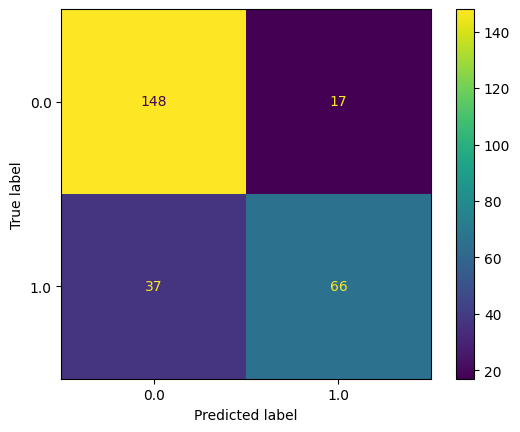

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, lgbm_predictions, labels=lgbm_model.classes_), display_labels=lgbm_model.classes_).plot()
plt.show()

### Построение алгоритма CatBoost

In [ ]:
 !pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cbc = CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42)
cbc.fit(X_train, y_train,eval_set=(X_test,y_test))

Learning rate set to 0.028193
0:	learn: 0.8475120	test: 0.7835821	best: 0.7835821 (0)	total: 47.1ms	remaining: 47.1s
1:	learn: 0.8443018	test: 0.7873134	best: 0.7873134 (1)	total: 48.3ms	remaining: 24.1s
2:	learn: 0.8539326	test: 0.7910448	best: 0.7910448 (2)	total: 49.9ms	remaining: 16.6s
3:	learn: 0.8507223	test: 0.7947761	best: 0.7947761 (3)	total: 52ms	remaining: 12.9s
4:	learn: 0.8523274	test: 0.7910448	best: 0.7947761 (3)	total: 53.8ms	remaining: 10.7s
5:	learn: 0.8507223	test: 0.7985075	best: 0.7985075 (5)	total: 55.3ms	remaining: 9.16s
6:	learn: 0.8507223	test: 0.7985075	best: 0.7985075 (5)	total: 56.8ms	remaining: 8.06s
7:	learn: 0.8507223	test: 0.7947761	best: 0.7985075 (5)	total: 58.6ms	remaining: 7.26s
8:	learn: 0.8507223	test: 0.7947761	best: 0.7985075 (5)	total: 60.3ms	remaining: 6.64s
9:	learn: 0.8523274	test: 0.8022388	best: 0.8022388 (9)	total: 62.2ms	remaining: 6.16s
10:	learn: 0.8523274	test: 0.7985075	best: 0.8022388 (9)	total: 64ms	remaining: 5.75s
11:	learn: 0.853

In [ ]:
cbc_predictions = cbc.predict(X_test)

#### Результат работы CatBoost

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,cbc_predictions))

              precision    recall  f1-score   support

         0.0       0.80      0.92      0.85       165
         1.0       0.82      0.63      0.71       103

    accuracy                           0.81       268
   macro avg       0.81      0.77      0.78       268
weighted avg       0.81      0.81      0.80       268



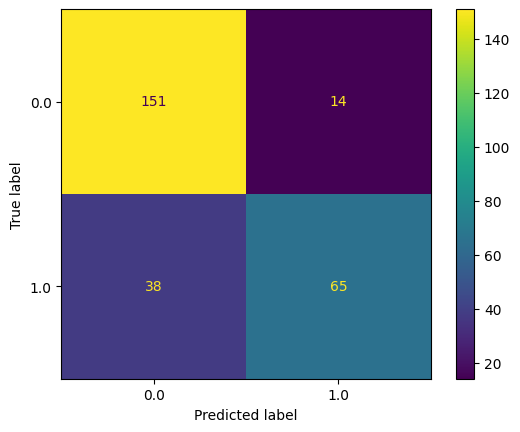

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, cbc_predictions, labels=cbc.classes_), display_labels=cbc.classes_).plot()
plt.show()

### Сравнение результатов моделей

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("CatBoost accuracy: ", accuracy_score(y_test, cbc_predictions))

CatBoost accuracy:  0.8059701492537313


In [ ]:
print("Light GBM accuracy: ", accuracy_score(y_test, lgbm_predictions))

Light GBM accuracy:  0.7985074626865671


In [ ]:
print("XGBoost accuracy: ", accuracy_score(y_test, gbm_predictions))

XGBoost accuracy:  0.8097014925373134


In [ ]:
print("AdaBoost accuracy: ", accuracy_score(y_test, predictions))

AdaBoost accuracy:  0.7611940298507462


Наиболее лучшей моделью оказалось XGBoost.

# Обучить модели машинного обучения для решения задачи **регрессии**, используя следующие boosting-алгоритмы: [CatBoost](https://catboost.ai/en/docs/concepts/python-reference_catboostregressor), [Light GBM](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html), [XGBoost](https://kirenz.github.io/regression/docs/xgboost-regression.html), [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html). Сравнить их точность и быстродействие.

Датасет: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html

## Подготовка данных для обучения моделей

In [ ]:
import pandas as pd
import numpy as np
from time import time
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_olivetti_faces


data = fetch_olivetti_faces()

X =  data.images.reshape(len(data.images), -1)
y = data.target

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\work\scikit_learn_data


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

accuracy = {}
speed = {}

In [ ]:
!pip install catboost

     ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
     -------------------------------------- 0.0/101.0 MB 991.0 kB/s eta 0:01:42
     ---------------------------------------- 0.2/101.0 MB 2.3 MB/s eta 0:00:44
     ---------------------------------------- 0.6/101.0 MB 4.2 MB/s eta 0:00:24
      --------------------------------------- 1.5/101.0 MB 8.2 MB/s eta 0:00:13
     - ------------------------------------- 4.2/101.0 MB 17.8 MB/s eta 0:00:06
     -- ------------------------------------ 5.3/101.0 MB 21.1 MB/s eta 0:00:05
     -- ------------------------------------ 5.3/101.0 MB 21.1 MB/s eta 0:00:05
     -- ------------------------------------ 7.4/101.0 MB 19.7 MB/s eta 0:00:05
     --- ----------------------------------- 8.3/101.0 MB 19.7 MB/s eta 0:00:05
     --- ----------------------------------- 9.6/101.0 MB 21.3 MB/s eta 0:00:05
     --- ---------------------------------- 10.2/101.0 MB 21.1 MB/s eta 0:00:05
     ---- --------------------------------- 11.

In [ ]:
!pip install xgboost

     ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/99.8 MB 1.1 MB/s eta 0:01:32
     ---------------------------------------- 0.3/99.8 MB 2.6 MB/s eta 0:00:39
     ---------------------------------------- 0.6/99.8 MB 4.3 MB/s eta 0:00:24
      --------------------------------------- 1.5/99.8 MB 7.7 MB/s eta 0:00:13
     - -------------------------------------- 3.8/99.8 MB 16.0 MB/s eta 0:00:07
     - -------------------------------------- 4.9/99.8 MB 19.5 MB/s eta 0:00:05
     - -------------------------------------- 5.0/99.8 MB 15.8 MB/s eta 0:00:06
     --- ------------------------------------ 7.5/99.8 MB 20.1 MB/s eta 0:00:05
     --- ------------------------------------ 8.8/99.8 MB 20.9 MB/s eta 0:00:05
     ---- ---------------------------------- 10.8/99.8 MB 31.2 MB/s eta 0:00:03
     ----- --------------------------------- 14.1/99.8 MB 36.4 MB/s eta 0:00:03
     ------- ------------------------------- 18.1/99

In [ ]:
!pip install lightgbm

     ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.3 MB 653.6 kB/s eta 0:00:02
     ------ --------------------------------- 0.2/1.3 MB 2.1 MB/s eta 0:00:01
     ------------------ --------------------- 0.6/1.3 MB 4.3 MB/s eta 0:00:01
     ---------------------------------------  1.3/1.3 MB 7.0 MB/s eta 0:00:01
     ---------------------------------------- 1.3/1.3 MB 6.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(random_state=33)

start = time()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
score = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)


speed['CatBoost'] = np.round(time() - start, 3)
accuracy['CatBoost'] = (np.mean(score))

print(f"Mean r2 score: {accuracy['CatBoost']}")
print(f"STD: {np.std(score):.3f}")
print(f"Run Time: {speed['CatBoost']}s")

Mean r2 score: 0.6974031951656096
STD: 0.035
Run Time: 2682.411s


In [ ]:
from lightgbm import LGBMRegressor

model = LGBMRegressor(random_state=33)

start = time()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
score = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)


speed['LGBM'] = np.round(time() - start, 3)
accuracy['LGBM'] = (np.mean(score))

print(f"Mean r2 score: {accuracy['LGBM']}")
print(f"STD: {np.std(score):.3f}")
print(f"Run Time: {speed['LGBM']}s")

Mean r2 score: 0.6479446503212206
STD: 0.044
Run Time: 36.8s


In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor(random_state=33)

start = time()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
score = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)


speed['XGBoost'] = np.round(time() - start, 3)
accuracy['XGBoost'] = (np.mean(score))

print(f"Mean r2 score: {accuracy['XGBoost']}")
print(f"STD: {np.std(score):.3f}")
print(f"Run Time: {speed['XGBoost']}s")

Mean r2 score: 0.5723590124912306
STD: 0.067
Run Time: 154.208s


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor(random_state=33)

start = time()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
score = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)


speed['AdaBoost'] = np.round(time() - start, 3)
accuracy['AdaBoost'] = (np.mean(score))

print(f"Mean r2 score: {accuracy['AdaBoost']}")
print(f"STD: {np.std(score):.3f}")
print(f"Run Time: {speed['AdaBoost']}s")

Mean r2 score: 0.5897895552499297
STD: 0.047
Run Time: 35.387s


In [ ]:
for algo, result in accuracy.items():
    print(f"{algo:{20}}: Score: {result}, Speed: {speed[algo]}")

CatBoost            : Score: 0.6974031951656096, Speed: 2682.411
LGBM                : Score: 0.6479446503212206, Speed: 36.8
XGBoost             : Score: 0.5723590124912306, Speed: 154.208
AdaBoost            : Score: 0.5897895552499297, Speed: 35.387
